In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
df = pd.read_csv('bmw.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of            model  year  price transmission  mileage fuelType  tax   mpg  \
0       5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1       6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2       5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3       1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4       7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
...          ...   ...    ...          ...      ...      ...  ...   ...   
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize  
0             2.0  
1             2.0  
2        

In [ ]:
sns.set_theme()

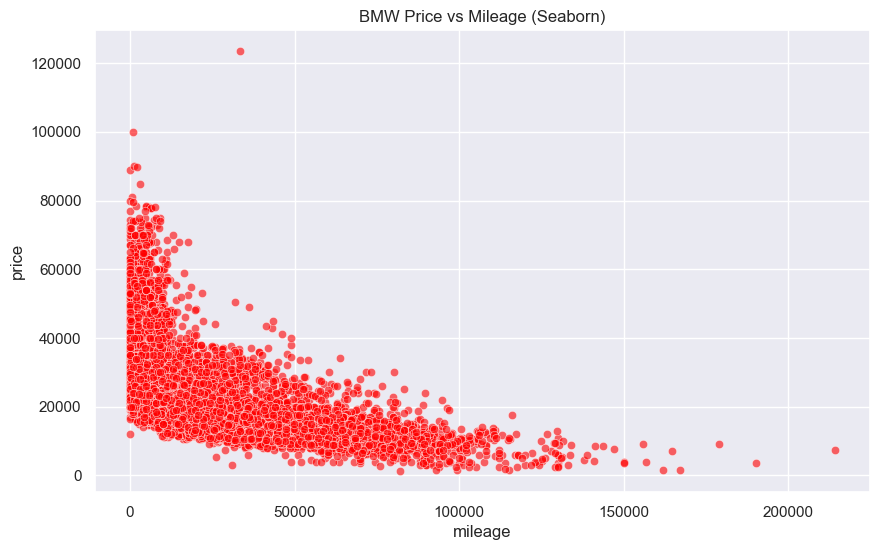

In [ ]:
plt.figure(figsize = (10,6))

sns.scatterplot(data=df, x='mileage' , y='price', color='red' , alpha=0.6)

plt.title('BMW Price vs Mileage (Seaborn)')
plt.show()

C:\Users\lolut\AppData\Local\Temp\ipykernel_7780\1240466045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='model', order=order_list, palette='viridis')


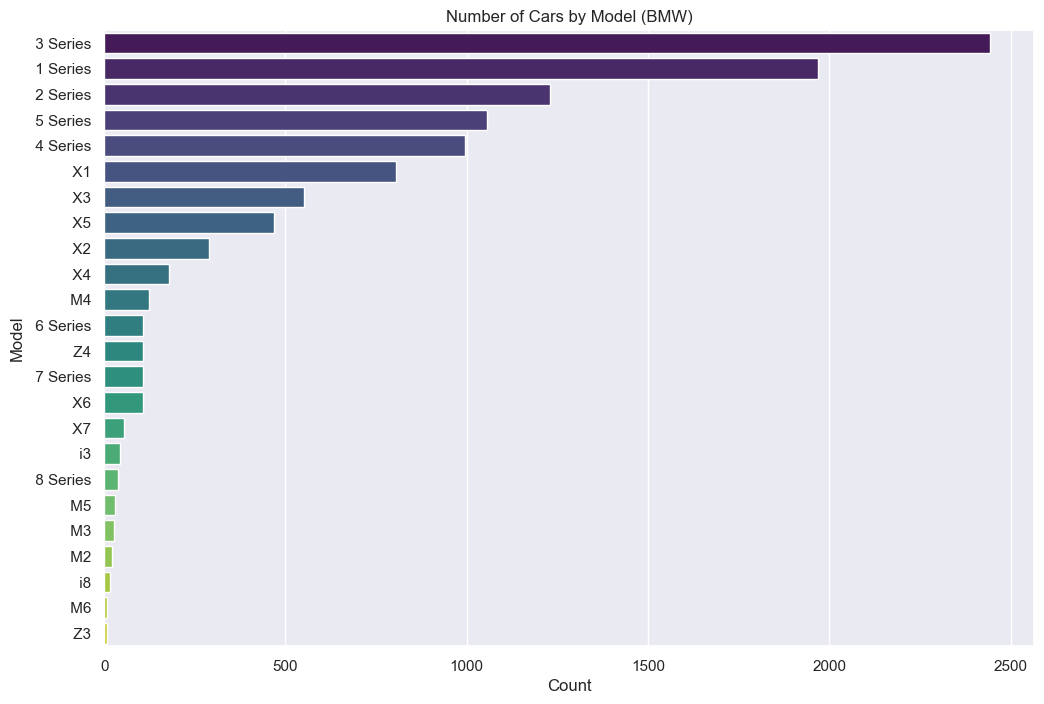

In [ ]:
plt.figure(figsize=(12, 8)) # กำหนดขนาดให้สูงหน่อย เพราะรุ่นรถน่าจะเยอะ

# order=... คือคำสั่งเรียงลำดับจากมากไปน้อย เพื่อให้กราฟดูเป็นระเบียบ
order_list = df['model'].value_counts().index

sns.countplot(data=df, y='model', order=order_list, palette='viridis')

plt.title('Number of Cars by Model (BMW)')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

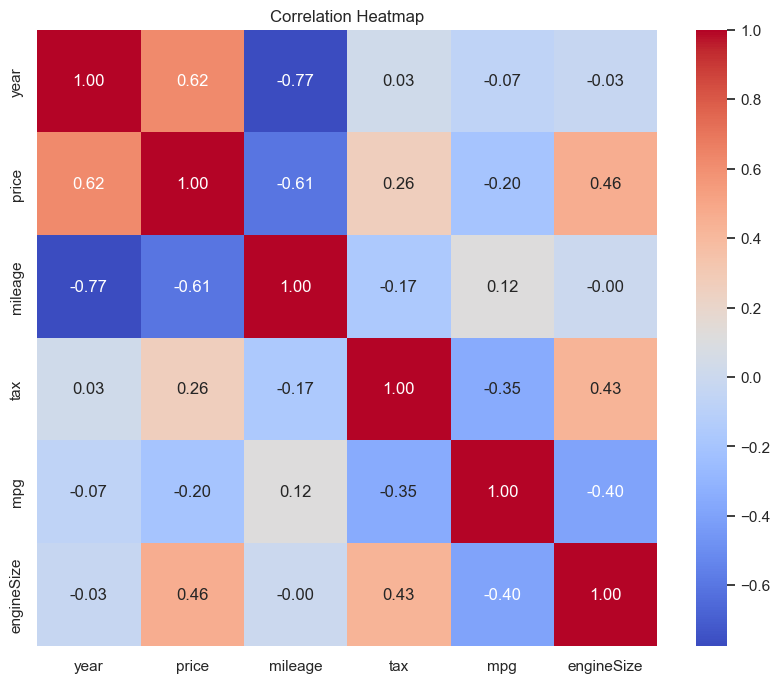

In [ ]:
plt.figure(figsize=(10, 8))

# คำนวณความสัมพันธ์ (เฉพาะข้อมูลตัวเลข)
# 1 = สัมพันธ์กันมาก (แปรผันตรง)
# -1 = สัมพันธ์กันมาก (แปรผกผัน)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

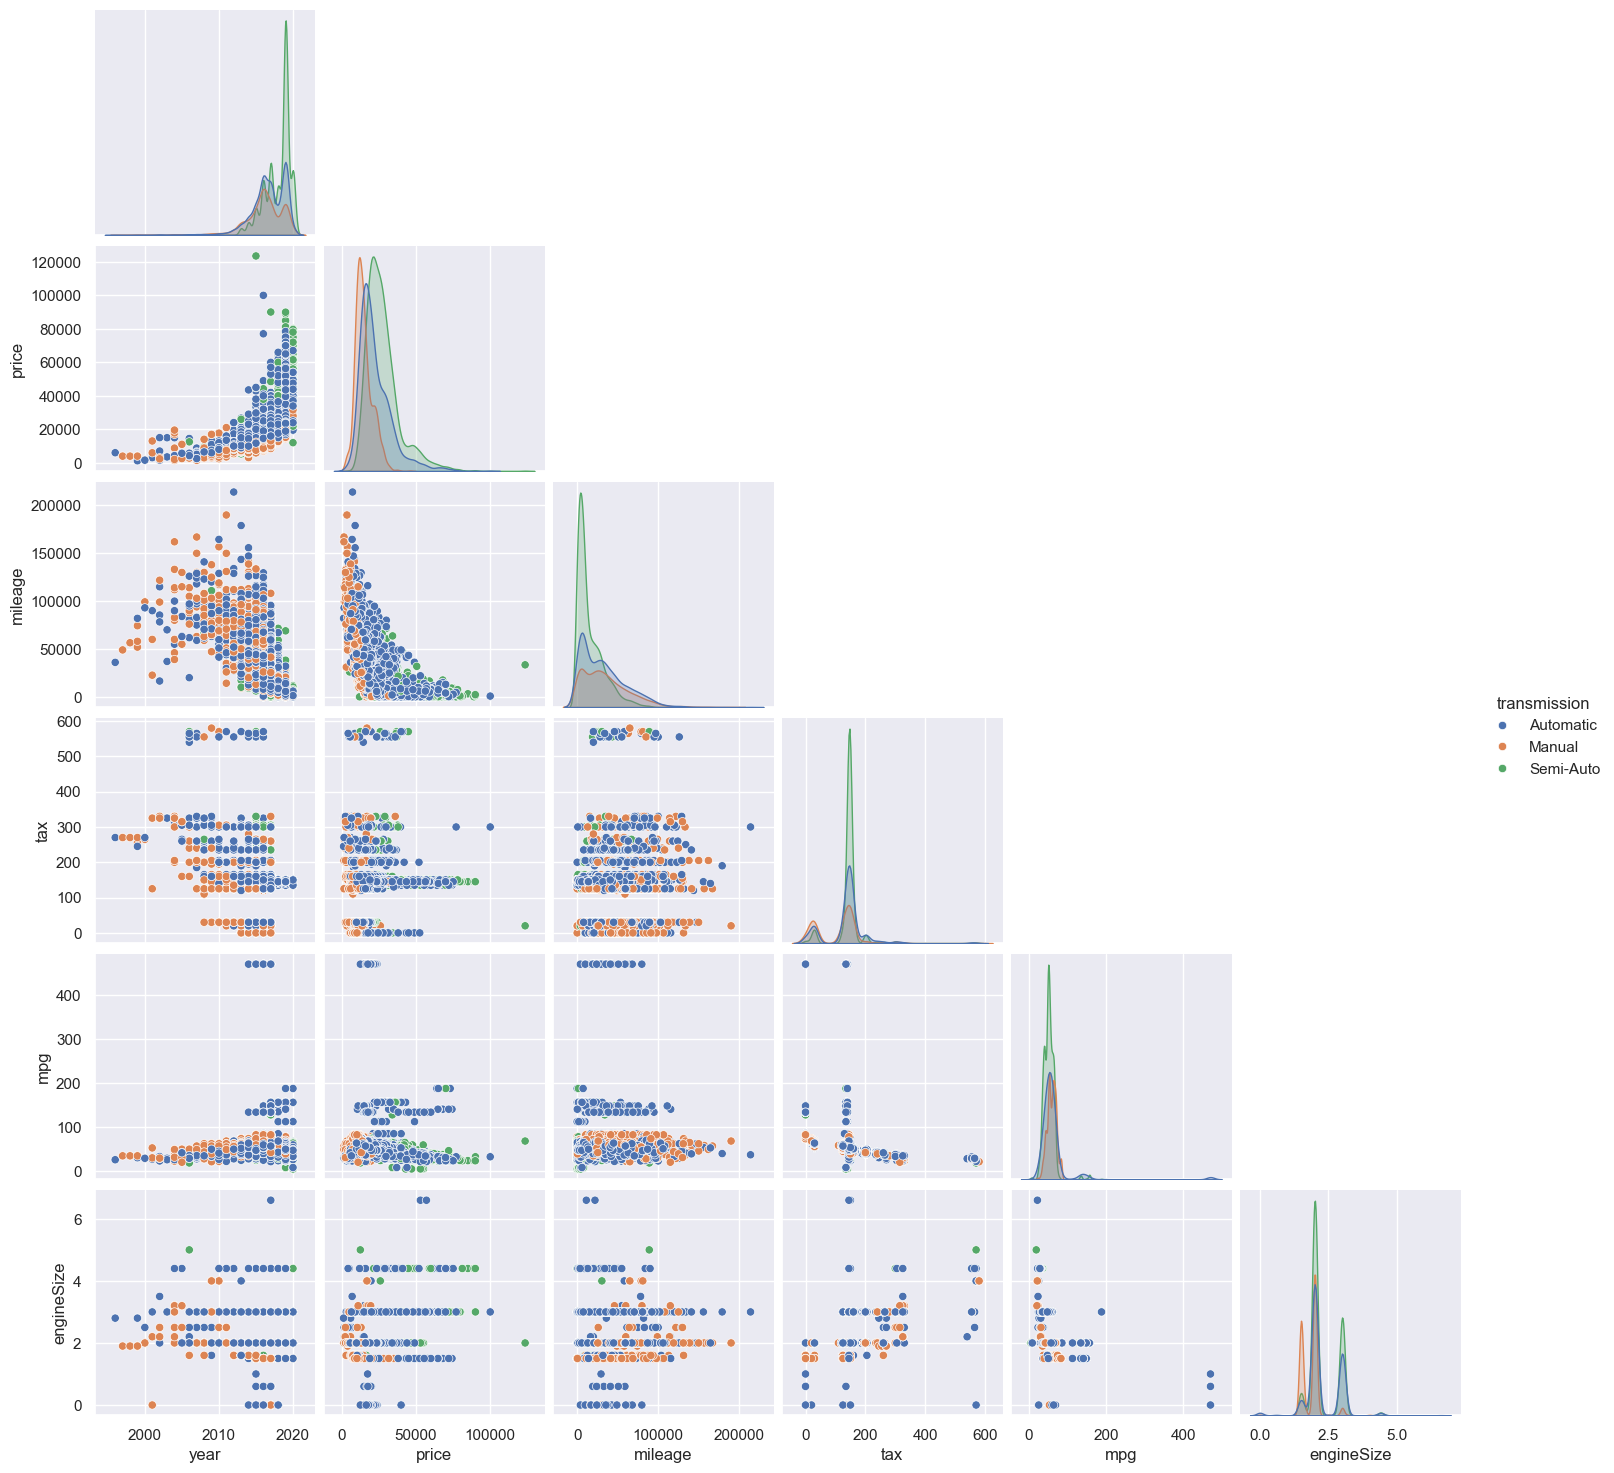

In [ ]:
# hue='transmission' จะช่วยแยกสีตามเกียร์ให้เห็นชัดขึ้น
sns.pairplot(df, hue='transmission', corner=True)
plt.show()

In [ ]:
# แปลงข้อมูลที่เป็นตัวหนังสือ (Categorical) ให้เป็นตัวเลขทั้งหมด
df_ready = pd.get_dummies(df, drop_first=True)

# ลองดูผลลัพธ์ (จะเห็นคอลัมน์เพิ่มขึ้นเยอะเลย เช่น transmission_Manual เป็น 0 หรือ 1)
print(df_ready.head())

   year  price  mileage  tax   mpg  engineSize  model_ 2 Series  \
0  2014  11200    67068  125  57.6         2.0            False   
1  2018  27000    14827  145  42.8         2.0            False   
2  2016  16000    62794  160  51.4         3.0            False   
3  2017  12750    26676  145  72.4         1.5            False   
4  2014  14500    39554  160  50.4         3.0            False   

   model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  model_ Z3  \
0            False            False             True  ...      False   
1            False            False            False  ...      False   
2            False            False             True  ...      False   
3            False            False            False  ...      False   
4            False            False            False  ...      False   

   model_ Z4  model_ i3  model_ i8  transmission_Manual  \
0      False      False      False                False   
1      False      False      False            

In [ ]:
# กำหนด X (ตัวแปรต้น) และ y (ตัวแปรตาม)
X = df_ready.drop('price', axis=1) # เอาทุกคอลัมน์ ยกเว้นราคา
y = df_ready['price']              # เอาแค่ราคา

# แบ่งข้อมูล: สอน 80%, เก็บไว้สอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"จำนวนรถที่ใช้สอน: {len(X_train)} คัน")
print(f"จำนวนรถที่เก็บไว้สอบ: {len(X_test)} คัน")

จำนวนรถที่ใช้สอน: 8624 คัน
จำนวนรถที่เก็บไว้สอบ: 2157 คัน


In [ ]:
# 1. สร้างโมเดลเปล่าๆ ขึ้นมา
model = LinearRegression()

# 2. สั่งให้โมเดล "เรียนรู้" จากข้อมูลชุด Train
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# ให้โมเดลลองทำข้อสอบ
score = model.score(X_test, y_test)

print(f"ความแม่นยำของโมเดล (R^2 Score): {score:.2f}")
# ถ้าได้เกิน 0.70 (70%) ถือว่าใช้ได้สำหรับการเริ่มต้นครับ

ความแม่นยำของโมเดล (R^2 Score): 0.86


In [ ]:
# ดึงข้อมูลรถคันแรกในชุด Test มาลองทาย
sample_car = X_test.iloc[0].to_frame().T
real_price = y_test.iloc[0]

# ให้โมเดลทำนายราคา
predicted_price = model.predict(sample_car)[0]

print(f"ราคาที่โมเดลทำนาย: {predicted_price:,.0f} บาท")
print(f"ราคาขายจริง:      {real_price:,.0f} บาท")
print(f"คลาดเคลื่อนไป:    {abs(predicted_price - real_price):,.0f} บาท")

ราคาที่โมเดลทำนาย: 16,174 บาท
ราคาขายจริง:      15,300 บาท
คลาดเคลื่อนไป:    874 บาท


C:\Users\lolut\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lolut\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lolut\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lolut\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lolut\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Use

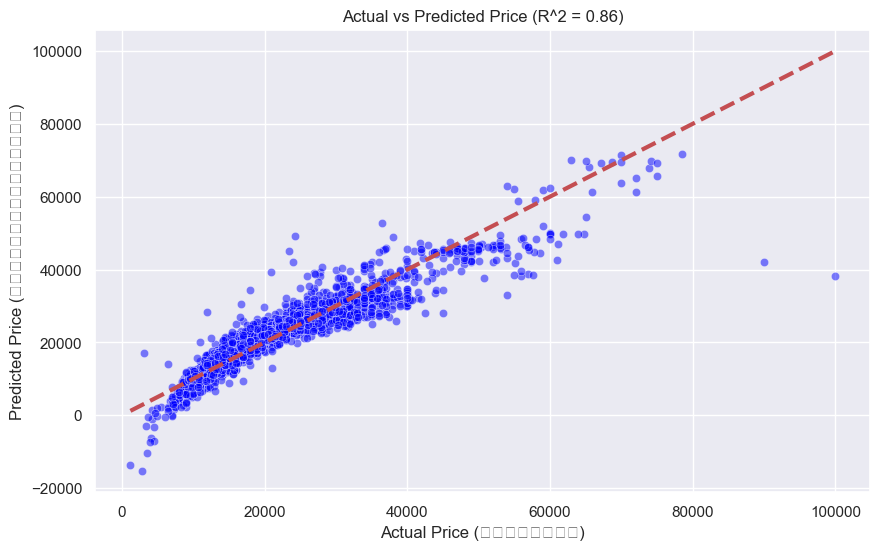

In [ ]:
# ให้โมเดลทำนายราคาของรถทั้งหมดในชุดสอบ (X_test)
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

# สร้างกราฟจุด
sns.scatterplot(x=y_test, y=predictions, alpha=0.5, color='blue')

# สร้างเส้นทแยงมุมสีแดง (เส้นอุดมคติ: ถ้าราคาจริง = ราคาที่ทาย จุดจะอยู่บนเส้นนี้)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel('Actual Price (ราคาจริง)')
plt.ylabel('Predicted Price (ราคาที่โมเดลทาย)')
plt.title('Actual vs Predicted Price (R^2 = 0.86)')
plt.grid(True)
plt.show()

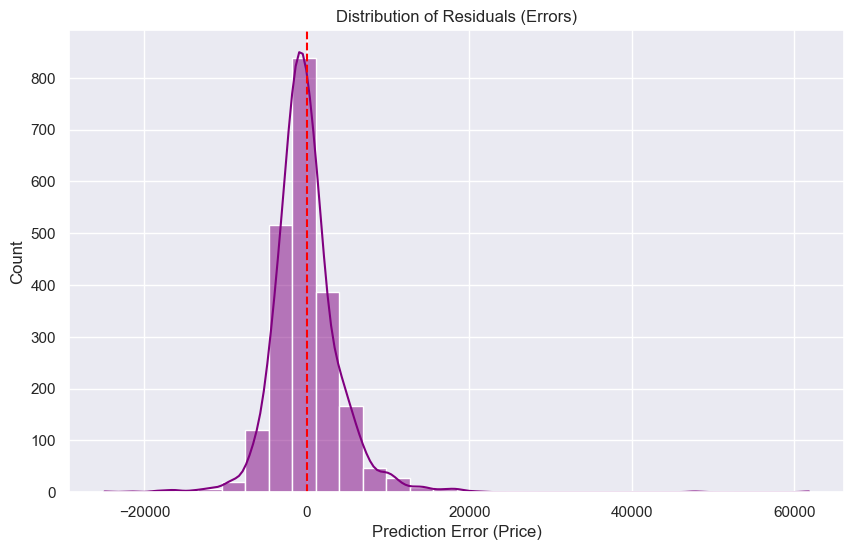

In [ ]:
plt.figure(figsize=(10, 6))

# คำนวณค่าความผิดพลาด (Error = ราคาจริง - ราคาที่ทาย)
residuals = y_test - predictions

sns.histplot(residuals, bins=30, kde=True, color='purple')

plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error (Price)')
plt.axvline(x=0, color='red', linestyle='--') # เส้นตรงกลาง (0 บาท)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. สร้างโมเดล (n_estimators=100 คือใช้ต้นไม้ช่วยคิด 100 ต้น)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. สอนโมเดล
rf_model.fit(X_train, y_train)

# 3. สอบวัดผล
rf_score = rf_model.score(X_test, y_test)

print(f"คะแนน Linear Regression เดิม: {score:.4f}")
print(f"คะแนน Random Forest ใหม่:    {rf_score:.4f}")

คะแนน Linear Regression เดิม: 0.8598
คะแนน Random Forest ใหม่:    0.9426


C:\Users\lolut\AppData\Local\Temp\ipykernel_7780\971458974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.head(7), y=feature_imp.head(7).index, palette='viridis')


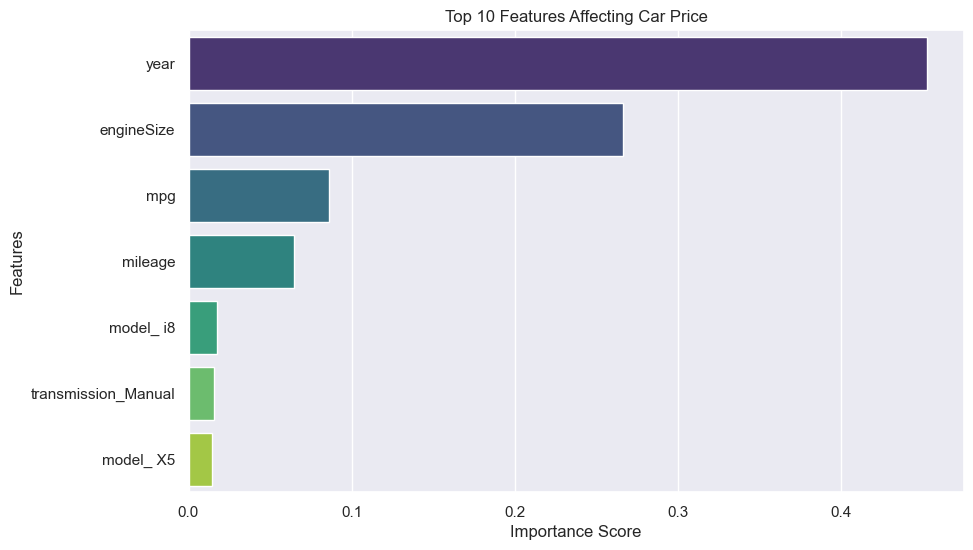

In [ ]:
# ดึงค่าความสำคัญออกมาเก็บใน DataFrame
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# เอามาพล็อตกราฟแท่ง (ดูแค่ 10 อันดับแรก)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(7), y=feature_imp.head(7).index, palette='viridis')

plt.title('Top 10 Features Affecting Car Price')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
def predict_bmw_price(year, mileage, tax, mpg, engineSize):
    # สร้างข้อมูลจำลอง (ต้องใส่ข้อมูลให้ครบตามที่โมเดลเคยเรียน)
    # หมายเหตุ: เพื่อความง่าย เราจะสมมติว่าเป็นเกียร์ Auto และเชื้อเพลิง Diesel (ค่า Default)
    # เพราะการใส่ One-Hot Encoding ทีละตัวจะยาวมาก

    # สร้าง array ข้อมูลที่มีค่าเป็น 0 ทั้งหมดก่อน
    input_data = pd.DataFrame([np.zeros(len(X.columns))], columns=X.columns)

    # ใส่ค่าที่เราต้องการ
    input_data['year'] = year
    input_data['mileage'] = mileage
    input_data['tax'] = tax
    input_data['mpg'] = mpg
    input_data['engineSize'] = engineSize

    # ทำนาย
    predicted = rf_model.predict(input_data)[0]
    return predicted

# --- ลองเปลี่ยนตัวเลขตรงนี้ ---
# ปี 2019, วิ่งไป 5000 ไมล์, ภาษี 145, กินน้ำมัน 30 mpg, เครื่อง 2.0
my_price = predict_bmw_price(year=2019, mileage=5000, tax=145, mpg=30, engineSize=2.0)

print(f"รถสเปคนี้ โมเดลตีราคาให้: {my_price:,.0f} ปอนด์ (GBP)")

รถสเปคนี้ โมเดลตีราคาให้: 35,300 ปอนด์ (GBP)


In [ ]:
# สร้างโมเดล
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# สอน
xgb_model.fit(X_train, y_train)

# สอบ
xgb_score = xgb_model.score(X_test, y_test)
print(f"XGBoost Score: {xgb_score:.4f}")

XGBoost Score: 0.9412


In [ ]:
# สร้างโมเดล (verbose=0 คือไม่ต้องปริ้นท์ข้อความตอนสอนเยอะๆ)
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0, random_state=42)

# สอน
cat_model.fit(X_train, y_train)

# สอบ
cat_score = cat_model.score(X_test, y_test)
print(f"CatBoost Score: {cat_score:.4f}")

CatBoost Score: 0.9253


In [ ]:
print("=== สรุปผลความแม่นยำ (R^2 Score) ===")
print(f"1. Linear Regression: {score:.4f}")
print(f"2. Random Forest:     {rf_score:.4f}")
print(f"3. XGBoost:           {xgb_score:.4f}")
print(f"4. CatBoost:          {cat_score:.4f}")

=== สรุปผลความแม่นยำ (R^2 Score) ===
1. Linear Regression: 0.8598
2. Random Forest:     0.9426
3. XGBoost:           0.9412
4. CatBoost:          0.9253
